# Use Case for Outlipy Handling

### **DISCLAIMER**

Please be aware that the code and techniques demonstrated here, utilizing Outlipy, are strictly for illustrative and educational purposes only. This demonstration has been performed without consideration of the underlying data context, domain knowledge, or business objectives.

**Important Considerations for Real-World Application**<br><br>
Blindly applying outlier detection and handling techniques can lead to severely misleading results. For professional Exploratory Data Analysis (EDA) and data preprocessing, you must take the following factors into account:

1. **Domain Knowledge is Crucial**: Outliers may represent legitimate, critical, and rare events (e.g., a high-value transaction, a system failure, or a unique physical measurement). Consult with subject matter experts before modifying or removing any data.

2. **Technique Context**: The chosen detection method (e.g., IQR, Z-score, Isolation Forest) and handling technique (e.g., Winsorization, removal, interpolation) must be carefully selected based on the nature and distribution of the data, as well as the requirements of the downstream model.

3. **Impact on Statistical Integrity**: Handling outliers always alters the variance and distribution of the data. Improper application can introduce bias and negatively affect the statistical integrity and generalizability of your final model.

Use the results of this demonstration with caution.

In [131]:
import pandas as pd
import outlipy
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df = pd.read_csv("../dataset/Salary_Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [133]:
df.dropna(inplace = True) # be sure to drop the NA values, or the detectors fails.

In [134]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


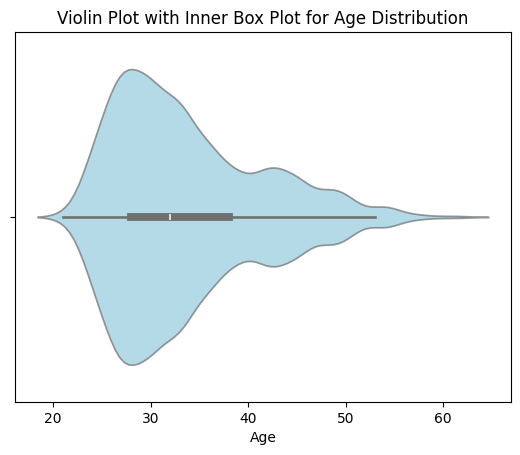

In [135]:
sns.violinplot(
    x='Age', 
    data=df, 
    inner='box', 
    color='skyblue', 
    alpha=0.7
)

plt.title("Violin Plot with Inner Box Plot for Age Distribution")
plt.show()

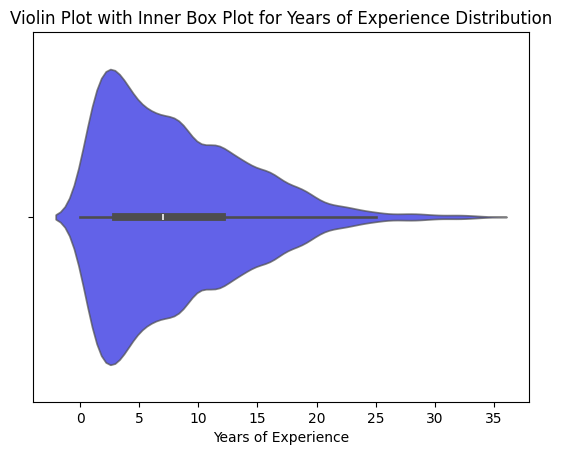

In [136]:
sns.violinplot(
    x='Years of Experience', 
    data=df, 
    inner='box', 
    color='blue', 
    alpha=0.7
)

plt.title("Violin Plot with Inner Box Plot for Years of Experience Distribution")
plt.show()

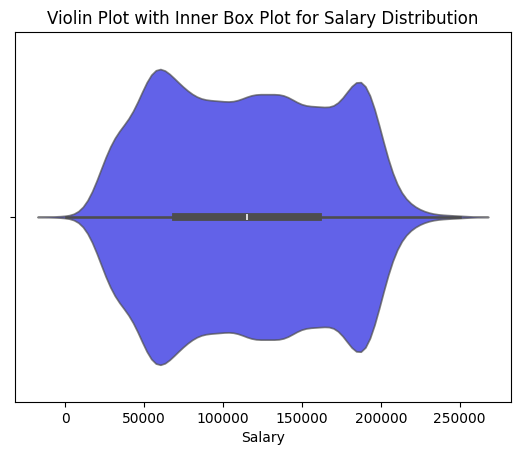

In [137]:
sns.violinplot(
    x='Salary', 
    data=df, 
    inner='box', 
    color='blue', 
    alpha=0.7
)

plt.title("Violin Plot with Inner Box Plot for Salary Distribution")
plt.show()

#### We'll be using the IQRDetector for detecting the outliers from the dataset

In [138]:
mask = df.outli.iqr()
mask.sum()

Age                    123
Years of Experience     75
Salary                   0
dtype: int64

# Using Handlers

The handlers can be used in two ways, either by using the pandas accessor api **"outli"**,
> ex: df.outli.mean() 

or

using the handler class directly.
> mean = MeanHandler() <br>
> result = mean.apply(df = df, outlier_mask = mask)

### Here are the list of detectors along with their accessor.

- **Central Tendency Imputation**
    - MeanHandler()
    - outli.mean()
    - MedianHandler()
    - outli.median
- **Winsorization**
    - WinsorizationHandler()
    - outli.winsor()
- **Remove**
    - RemoveHandler()
    - outli.remove()
- **Constant Imputation**
    - ConstantHandler()
    - outli.conrep()
- **Interpolate**
    - InterpolateHandler()
    - outli.interpolate()
- **Grouped Handling**
    - GroupedHandler()
    - outli.group()


### Central Tendency Imputation

The central tendency imputation method handles outliers by replacing them with a calculated measure of the dataset's center, typically the mean or median. The process for both is identical and statistically crucial: the identified outliers are first excluded from the column, and the replacement value is then calculated only from the remaining non-outlying data.

#### To use the Mean:
The accessor method, has two arguments: threshold and columns.
- outlier_mask (pd.DataFrame): the outlier mask from the detectors.
- columns (Optional[List[str]]): the colunms you want to include.

> df.outli.mean(outlier_mask: pd.DataFrame, columns: Optional[List[str]] = None) <br>

When using class MeanHandler:

> mean = outlipy.MeanHandler(columns: Optional[List[str]] = None) <br>
> result = mean.apply(df: pd.DataFrame, outlier_mask: pd.DataFrame)

In [139]:
result = df.outli.mean(outlier_mask = mask)
result.outli.iqr().sum() # type: ignore

Age                    66
Years of Experience     0
Salary                  0
dtype: int64

In [140]:
method = outlipy.MeanHandler()
result = method.apply(df, mask)
result.outli.iqr().sum()

Age                    66
Years of Experience     0
Salary                  0
dtype: int64

In [141]:
result.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.214905,7.855277,115329.253061
std,7.000452,5.620276,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,37.000000,12.000000,160000.000000
max,53.000000,25.000000,250000.000000


In [142]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


#### To use the Median:
The accessor method, has two arguments: threshold and columns.
- outlier_mask (pd.DataFrame): the outlier mask from the detectors.
- columns (Optional[List[str]]): the colunms you want to include.

> df.outli.median(outlier_mask: pd.DataFrame, columns: Optional[List[str]] = None) <br>

When using class MedianHandler():

> median = outlipy.MedianHandler(columns: Optional[List[str]] = None) <br>
> result = median.apply(df: pd.DataFrame, outlier_mask: pd.DataFrame)

In [143]:
result = df.outli.median(outlier_mask = mask)
result.outli.iqr().sum() # type: ignore

Age                    66
Years of Experience     0
Salary                  0
dtype: int64

In [144]:
method = outlipy.MedianHandler()
result = method.apply(df, mask)
result.outli.iqr().sum()

Age                    66
Years of Experience     0
Salary                  0
dtype: int64

In [145]:
result.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.192595,7.845700,115329.253061
std,7.002352,5.620997,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,37.000000,12.000000,160000.000000
max,53.000000,25.000000,250000.000000


In [146]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


### Winsorization

Winsorization is a statistical method used to limit the influence of extreme values (outliers) in a dataset by replacing them with values that are less extreme. Essentially, it caps the data at a specified upper and lower boundary. This method does not need outlier_mask.

#### To use the Winsorization:
The accessor method, has two arguments: threshold and columns.
- limits (Tuple[float, float]): the lower and upper limit for to be capped (default (0.05, 0.95))
- columns (Optional[List[str]]): the colunms you want to include.

> df.outli.winsor(limits (Tuple[float, float]) = (0.05, 0.95), columns: Optional[List[str]] = None) <br>

When using class WinsorizationHandler:

> winsor = outlipy.WinsorizationHandler(limits: (Tuple[float, float]) = (0.05. 0.95), columns: Optional[List[str]] = None) <br>
> result = winsor.apply(df: pd.DataFrame)

In [147]:
result = df.outli.winsor()
result.outli.iqr().sum()

Age                    0
Years of Experience    0
Salary                 0
dtype: int64

In [148]:
method = outlipy.WinsorizationHandler()
result = method.apply(df, mask)
result.outli.iqr().sum()

Age                    0
Years of Experience    0
Salary                 0
dtype: int64

In [149]:
result.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.493580,7.897581,115219.348164
std,7.184177,5.485109,51438.926697
min,24.000000,1.000000,35000.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,49.000000,19.000000,195000.000000


In [150]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


### Remove

"Remove outlier handling," often called Trimming or Truncation, is the simplest method for dealing with outliers. It involves deleting or discarding the observations (rows) that are identified as extreme from the dataset before analysis or modeling.

#### To use the Constant Imputation:
The accessor method, has two arguments: outlier_mask and columns.
- outlier_mask (pd.DataFrame): the outlier mask from the detectors.
- columns (Optional[List[str]]): the colunms you want to include.

> df.outli.remove(outlier_mask: pd.DataFrame, columns: Optional[List[str]] = None) <br>

When using class RemoveHandler():

> remove = outlipy.RemoveHandler(fill_value: float, columns: Optional[List[str]] = None) <br>
> result = remove.apply(df: pd.DataFrame, outlier_mask: pd.DataFrame)

In [151]:
result = df.outli.remove(outlier_mask = mask)
result.outli.iqr().sum()

Age                    42
Years of Experience    39
Salary                  0
dtype: int64

In [152]:
result.describe()

,Age,Years of Experience,Salary
count,6550.000000,6550.000000,6550.000000
mean,33.143817,7.744962,113627.478168
std,6.984381,5.581422,52109.669379
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,112719.500000
75%,37.000000,11.000000,160000.000000
max,53.000000,25.000000,250000.000000


In [153]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


### Constant Imputation

Constant imputation (also known as arbitrary value imputation) is a straightforward method for handling outliers where you replace all detected extreme values with a single, predefined constant number.

This technique is simple to implement but carries significant risk of introducing bias and distorting the underlying data distribution.

#### To use the Constant Imputation:
The accessor method, has three arguments: fill_value, outlier_mask, and columns.
- fill_value (float): the value to replace the outliers.
- outlier_mask (pd.DataFrame): the outlier mask from the detectors.
- columns (Optional[List[str]]): the colunms you want to include.

> df.outli.conrep(fill_value: (float), outlier_mask: pd.DataFrame, columns: Optional[List[str]] = None) <br>

When using class ConstantHandler():

> cons = outlipy.ConstantHandler(fill_value: float, columns: Optional[List[str]] = None) <br>
> result = cons.apply(df: pd.DataFrame, outlier_mask: pd.DataFrame)

In [154]:
result = df.outli.conrep(fill_value = 30, outlier_mask = mask, columns = ["Age"])
result.outli.iqr().sum()

Age                    66
Years of Experience    75
Salary                  0
dtype: int64

In [155]:
# it is therefore better to separately assess different columns as constant imputation is not robust.
result = result.outli.conrep(fill_value = 0, outlier_mask = mask, columns = ["Years of Experience"])
result.outli.iqr().sum()

Age                    66
Years of Experience     0
Salary                  0
dtype: int64

In [156]:
# using the class method
method = outlipy.ConstantHandler(fill_value = 30, columns = ["Age"])
result = method.apply(df, mask)
result.outli.iqr().sum()


Age                    66
Years of Experience    75
Salary                  0
dtype: int64

In [157]:
method = outlipy.ConstantHandler(fill_value = 0, columns = ["Years of Experience"])
result = method.apply(result, mask)
result.outli.iqr().sum()

Age                    66
Years of Experience     0
Salary                  0
dtype: int64

In [158]:
result.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.155867,7.767319,115329.253061
std,7.013748,5.680740,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,31.000000,7.000000,115000.000000
75%,37.000000,12.000000,160000.000000
max,53.000000,25.000000,250000.000000


In [159]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


### Interpolate

Unlike mean/median imputation, which uses a single global statistic, interpolation uses the nearest valid values, which helps to preserve the sequential trend and local structure of the data. This is particularly valuable for time series data. 

Warning using this:

**Assumption of Linearity/Smoothness**: The linear method assumes a straight-line relationship between neighbors, which may be inaccurate for highly volatile data. Polynomial/spline methods can be too aggressive and lead to overfitting or unrealistic curve fitting (Runge's phenomenon).

**Index Dependency**: Interpolation relies heavily on the order of the index. If the data is not ordered logically (e.g., by time or sequence), the result of the interpolation may be meaningless.

#### To use the Interpolate:
The accessor method, has three arguments: method, outlier_mask, and columns.
- method (str): method from pandas.interpolate() method (default 'linear').
- outlier_mask (pd.DataFrame): the outlier mask from the detectors.
- columns (Optional[List[str]]): the colunms you want to include.

> df.outli.interpolate(method: str = 'linear', outlier_mask: pd.DataFrame, columns: Optional[List[str]] = None) <br>

When using class InterpolateHandler():

> inter = outlipy.InterpolateHandler(method: str = 'linear', columns: Optional[List[str]] = None) <br>
> result = inter.apply(df: pd.DataFrame, outlier_mask: pd.DataFrame)

In [160]:
result = df.outli.interpolate(method = 'linear', outlier_mask = mask)
result.outli.iqr().sum()

Age                    66
Years of Experience     0
Salary                  0
dtype: int64

In [161]:
method = outlipy.InterpolateHandler()
result = method.apply(df, mask)
result.outli.iqr().sum()

Age                    66
Years of Experience     0
Salary                  0
dtype: int64

In [162]:
result.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.231114,7.885563,115329.253061
std,7.029636,5.641253,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,37.000000,12.000000,160000.000000
max,53.000000,25.000000,250000.000000


In [163]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


### Grouped

The group handling method for outliers involves using a statistical measure (like the mean or median) that is calculated not from the entire dataset, but from a meaningful subgroup or partition of the data.

#### To use the Grouped:
The accessor method, has four arguments: group_by, agg_func, outlier_mask, and columns.
- group_by (List[str]): a list of categorical column names used to define the subgroups for contextual imputation.
- agg_func (str): the aggregation function (e.g., 'mean', 'median') that will be applied to the non-outlier data within each group to calculate the replacement value (default 'median').
- outlier_mask (pd.DataFrame): the outlier mask from the detectors.
- columns (Optional[List[str]]): the colunms you want to include.

> df.outli.group(group_by: List(str), agg_func: (str) = 'median', outlier_mask: pd.DataFrame, columns: Optional[List[str]] = None) <br>

When using class GroupedHandler():

> group = outlipy.GroupedHandler(group_by: List(str), agg_func: (str) = 'median', columns: Optional[List[str]] = None) <br>
> result = group.apply(df: pd.DataFrame, outlier_mask: pd.DataFrame)

In [164]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [165]:
result = df.outli.group(group_by = ["Job Title"], agg_func = 'median', outlier_mask = mask)
result.outli.iqr().sum()

Age                    0
Years of Experience    0
Salary                 0
dtype: int64

In [166]:
method = outlipy.GroupedHandler(group_by = ["Job Title"], agg_func = 'mean')
result = method.apply(df, mask)
result.outli.iqr().sum()

Age                    0
Years of Experience    0
Salary                 0
dtype: int64

In [167]:
result.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.361855,7.915949,115329.253061
std,7.093631,5.652937,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,53.000000,25.000000,250000.000000


In [168]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000
